In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/yolo-v5/tflite/tflite-tflite-model/1/1.tflite
/kaggle/input/weed-detection-in-soybean-crops/dataset/soil/1259.tif
/kaggle/input/weed-detection-in-soybean-crops/dataset/soil/659.tif
/kaggle/input/weed-detection-in-soybean-crops/dataset/soil/274.tif
/kaggle/input/weed-detection-in-soybean-crops/dataset/soil/315.tif
/kaggle/input/weed-detection-in-soybean-crops/dataset/soil/919.tif
/kaggle/input/weed-detection-in-soybean-crops/dataset/soil/2037.tif
/kaggle/input/weed-detection-in-soybean-crops/dataset/soil/1819.tif
/kaggle/input/weed-detection-in-soybean-crops/dataset/soil/1938.tif
/kaggle/input/weed-detection-in-soybean-crops/dataset/soil/948.tif
/kaggle/input/weed-detection-in-soybean-crops/dataset/soil/123.tif
/kaggle/input/weed-detection-in-soybean-crops/dataset/soil/2939.tif
/kaggle/input/weed-detection-in-soybean-crops/dataset/soil/959.tif
/kaggle/input/weed-detection-in-soybean-crops/dataset/soil/2824.tif
/kaggle/input/weed-detection-in-soybean-crops/dataset/soil/1724

In [2]:
import tensorflow as tf
# Initialize the TPU
resolver = tf.distribute.cluster_resolver.TPUClusterResolver()
tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)

# Create a TPU strategy
tpu_strategy = tf.distribute.experimental.TPUStrategy(resolver)

D0920 04:02:20.952738727      14 config.cc:119]                        gRPC EXPERIMENT tcp_frame_size_tuning               OFF (default:OFF)
D0920 04:02:20.952761703      14 config.cc:119]                        gRPC EXPERIMENT tcp_rcv_lowat                       OFF (default:OFF)
D0920 04:02:20.952765146      14 config.cc:119]                        gRPC EXPERIMENT peer_state_based_framing            OFF (default:OFF)
D0920 04:02:20.952767969      14 config.cc:119]                        gRPC EXPERIMENT flow_control_fixes                  ON  (default:ON)
D0920 04:02:20.952770517      14 config.cc:119]                        gRPC EXPERIMENT memory_pressure_controller          OFF (default:OFF)
D0920 04:02:20.952773665      14 config.cc:119]                        gRPC EXPERIMENT unconstrained_max_quota_buffer_size OFF (default:OFF)
D0920 04:02:20.952776260      14 config.cc:119]                        gRPC EXPERIMENT new_hpack_huffman_decoder           ON  (default:ON)
D0920 04:02:20.

INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.
INFO:tensorflow:Initializing the TPU system: local
INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


In [3]:
import numpy as np

import os
import cv2
import glob
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D  # Import GlobalAveragePooling2D
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
# Define the list of labels
labels = ["broadleaf", "grass", "soil", "soybean"]

# Load the dataset and preprocess the images
X = []
Y = []
image_size = (224, 224)  # Adjust to match VGG16 input size

for label in labels:
    dataset_path = "/kaggle/input/weed-detection-in-soybean-crops/dataset/" + label + "/"
    file_paths = glob.glob(dataset_path + "*")
    
    for file_path in file_paths:
        image = cv2.imread(file_path)
        img = cv2.resize(image, image_size)
        X.append(img)
        Y.append(label)

# Convert labels to numerical values
label_to_index = {label: index for index, label in enumerate(labels)}
Y = [label_to_index[label] for label in Y]

# Convert lists to NumPy arrays
X = np.array(X)
Y = np.array(Y)


In [5]:
# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

# Preprocess the images for VGG16
X_train = tf.keras.applications.vgg16.preprocess_input(X_train)
X_test = tf.keras.applications.vgg16.preprocess_input(X_test)


In [6]:
with tpu_strategy.scope():
    # Load the pre-trained VGG16 model
    base_model = VGG16(weights='imagenet', include_top=False)

    # Add custom layers for classification
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    predictions = Dense(len(labels), activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=predictions)

    # Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    history =model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=10, batch_size=32)

    # Evaluate the model
    test_loss, test_accuracy = model.evaluate(X_test, Y_test)
    print("Test Accuracy:", test_accuracy)



58889256/58889256 [==============================] - 0s 0us/step
Epoch 1/10


2023-09-20 04:05:55.048150: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.
2023-09-20 04:05:55.251529: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.


336/336 [==============================] - ETA: 0s - loss: 2.3396 - accuracy: 0.6194

2023-09-20 04:06:47.796917: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.
2023-09-20 04:06:47.930279: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp.


336/336 [==============================] - 67s 133ms/step - loss: 2.3396 - accuracy: 0.6194 - val_loss: 0.4423 - val_accuracy: 0.8090
Epoch 2/10
336/336 [==============================] - 14s 42ms/step - loss: 0.3873 - accuracy: 0.8510 - val_loss: 0.2876 - val_accuracy: 0.8833
Epoch 3/10
336/336 [==============================] - 14s 42ms/step - loss: 0.2855 - accuracy: 0.8855 - val_loss: 0.2478 - val_accuracy: 0.9031
Epoch 4/10
336/336 [==============================] - 14s 43ms/step - loss: 0.2991 - accuracy: 0.8814 - val_loss: 0.3678 - val_accuracy: 0.8542
Epoch 5/10
336/336 [==============================] - 14s 42ms/step - loss: 0.2440 - accuracy: 0.8992 - val_loss: 0.2160 - val_accuracy: 0.9109
Epoch 6/10
336/336 [==============================] - 14s 42ms/step - loss: 0.2193 - accuracy: 0.9083 - val_loss: 0.1808 - val_accuracy: 0.9205
Epoch 7/10
336/336 [==============================] - 14s 43ms/step - loss: 0.2127 - accuracy: 0.9108 - val_loss: 0.2052 - val_accuracy: 0.9092
Ep

Model Accuracy



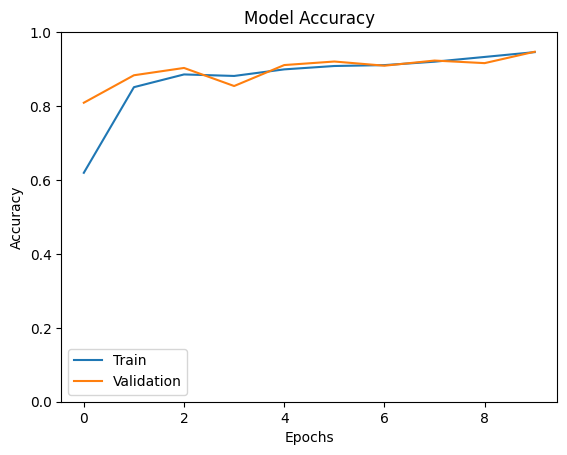

In [7]:
import matplotlib.pyplot as plt
ax = plt.gca()
ax.set_ylim([0, 1])
print("Model Accuracy\n")
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'])
plt.show()

Model Loss



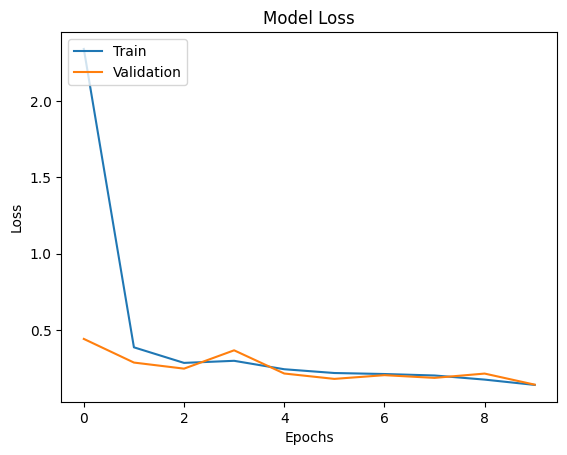

In [8]:
ax = plt.gca()
# ax.set_ylim([0, 1])
print("Model Loss\n")
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [9]:
# Save the model architecture as JSON
model_json = model.to_json()

# Specify the file path where you want to save the JSON file
json_file_path = 'model.json'